In [2]:
#make sure pyreadr installed 
#!'/Users/annieulichney/opt/anaconda3/bin/python' -m pip install pyreadr

Questions
- Regression vs. classification? forest.l and nn_forest.l are numeric which is what made me do regression here

In [3]:
import pyreadr
import pandas as pd


import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [4]:
result = pyreadr.read_r('/Users/annieulichney/Desktop/Deforestation/analysis.Rdata')

In [5]:
type(result)

collections.OrderedDict

In [6]:
df = pd.DataFrame(result['forest_full'])

In [7]:
df

,ID,forest.diff,FID,x,y,year,forest.l,nn_forest.l,rain1,elevation,...,ironore,silver,copper,gold,soy_price,beef_price,ag_jobs,mining_jobs,public_jobs,construction_jobs
0,1100015,0.0,8436645,-62.825,-12.925,2002,97.0,85.50,21.81664,154.0,...,29.309999,147894.59375,1559.479980,9965846.0,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
1,1100015,16.0,8436646,-62.825,-12.875,2002,65.0,68.75,22.56391,146.0,...,29.309999,147894.59375,1559.479980,9965846.0,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
2,1100015,5.0,8440244,-62.775,-12.975,2002,92.0,87.75,21.30135,156.0,...,29.309999,147894.59375,1559.479980,9965846.0,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
3,1100015,9.0,8440245,-62.775,-12.925,2002,83.0,73.75,22.10585,156.0,...,29.309999,147894.59375,1559.479980,9965846.0,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
4,1100015,13.0,8443844,-62.725,-12.975,2002,79.0,80.25,20.90614,155.0,...,29.309999,147894.59375,1559.479980,9965846.0,188.866170,95.403771,15.347222,1.458333,44.791667,1.875000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427893,5108956,-4.0,8861597,-56.925,-9.775,2016,89.0,85.00,31.59048,251.0,...,58.419998,551389.62500,4867.899902,40156276.0,362.706821,178.208263,39.528024,0.221239,23.893805,2.507375
2427894,5108956,8.0,8861598,-56.925,-9.725,2016,69.0,82.50,30.98632,248.0,...,58.419998,551389.62500,4867.899902,40156276.0,362.706821,178.208263,39.528024,0.221239,23.893805,2.507375
2427895,5108956,-3.0,8861599,-56.925,-9.675,2016,86.0,78.00,30.45899,220.0,...,58.419998,551389.62500,4867.899902,40156276.0,362.706821,178.208263,39.528024,0.221239,23.893805,2.507375
2427896,5108956,-21.0,8865196,-56.875,-9.825,2016,97.0,85.00,30.83407,224.0,...,58.419998,551389.62500,4867.899902,40156276.0,362.706821,178.208263,39.528024,0.221239,23.893805,2.507375


In [8]:
np.unique(df['year'])

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016], dtype=int32)

Text(0.5, 1.0, 'Year Histogram')

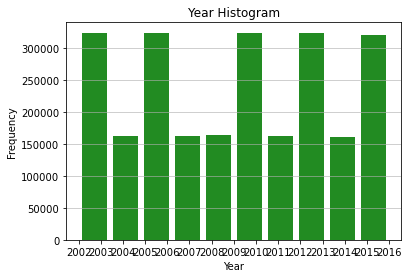

In [9]:
plt.hist(x = df['year'], color = 'forestgreen', rwidth = 0.8)
plt.grid(axis = 'y', alpha = 0.75)
plt.xticks(np.unique(df['year']))
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Year Histogram')

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Text(0.5, 1.0, 'Forest Loss Histogram')

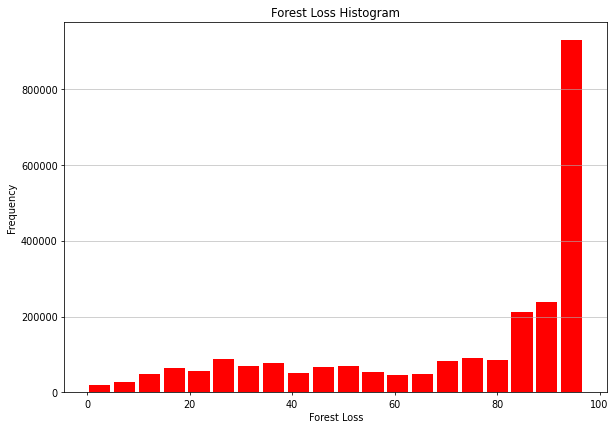

In [11]:
#Forest loss scatterplot 
plt.figure(figsize = (10, 7), dpi = 70)
plt.hist(x = df['forest.l'], bins = 20, color = 'red', rwidth = 0.85)
plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Forest Loss')
plt.ylabel('Frequency')
plt.title('Forest Loss Histogram')

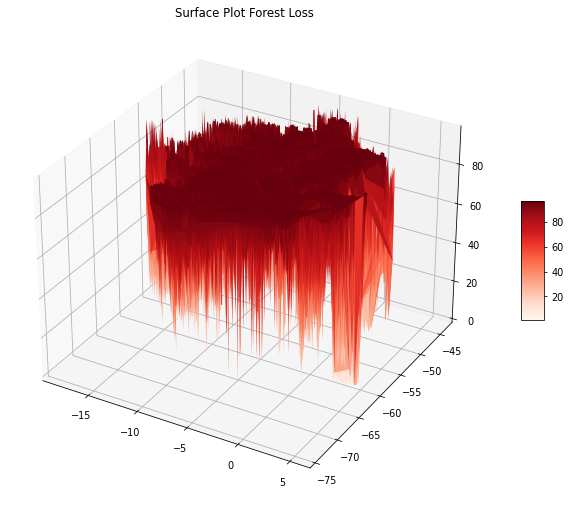

In [12]:
#forest loss 3d plot
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['forest.l'], cmap = plt.get_cmap('Reds'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Forest Loss')
 

plt.show()

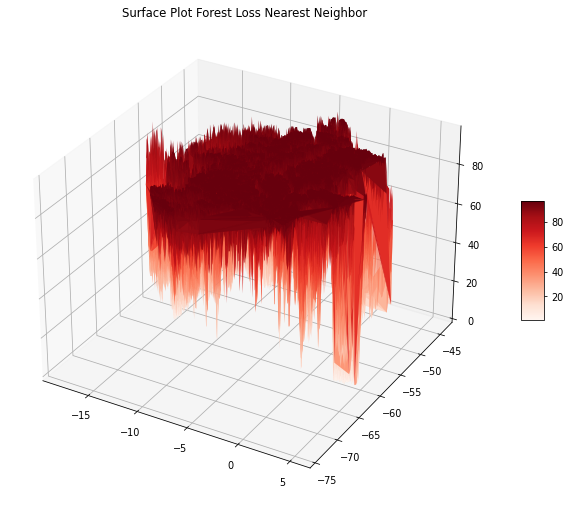

In [13]:
#forest loss 3d plot with nearest neighbor
fig = plt.figure(figsize = (14, 9), dpi = 70)
ax = fig.gca(projection = '3d')
surf = ax.plot_trisurf(df['y'], df['x'], df['nn_forest.l'], cmap = plt.get_cmap('Reds'), linewidth = 0.2)

fig.colorbar(surf, ax = ax,
             shrink = 0.25, aspect = 5)
 
ax.set_title('Surface Plot Forest Loss Nearest Neighbor')

plt.show()

## Decision Tree

In [29]:
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [30]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [33]:
y = df['nn_forest.l']
df1 = df.copy()
X = df1.drop('nn_forest.l', axis =1)

In [34]:
std_slc = StandardScaler()

In [35]:
pca = decomposition.PCA()

In [36]:
dtreeReg = tree.DecisionTreeRegressor()

In [37]:
pipe = Pipeline(steps=[("std_slc", std_slc),
                           ("pca", pca),
                           ("dtreeReg", dtreeReg)])

In [38]:
n_components = list(range(1,X.shape[1]+1,1))

In [41]:
criterion = ["friedman_mse", "mse"]
max_depth = [4,6,8,10]

In [42]:
parameters = dict(pca__n_components=n_components,
                      dtreeReg__criterion=criterion,
                      dtreeReg__max_depth=max_depth)

In [ ]:
clf = GridSearchCV(pipe, parameters)
clf.fit(X, y)

In [ ]:
print("Best Number Of Components:", clf.best_estimator_.get_params()["pca__n_components"])
print();
print(clf.best_estimator_.get_params()["dtreeReg"])

In [ ]:
CV_Result = cross_val_score(clf, X, y, cv=3, n_jobs=-1, scoring="r2")
print(); print(CV_Result)
print(); print(CV_Result.mean())
print(); print(CV_Result.std())

In [24]:
%matplotlib inline

from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeRegressor#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree

In [46]:
#check for nulls
df.isnull().any()

ID                   False
forest.diff          False
FID                  False
x                    False
y                    False
year                 False
forest.l             False
nn_forest.l          False
rain1                False
elevation            False
slope                False
aspect               False
near_mines           False
near_roads           False
near_hidrovia        False
indigenous_homol     False
mun_election_year    False
new_forest_code      False
lula                 False
dilma                False
temer                False
bolsonaro            False
fed_election_year    False
populacao            False
pib_pc               False
ironore              False
silver               False
copper               False
gold                 False
soy_price            False
beef_price           False
ag_jobs              False
mining_jobs          False
public_jobs          False
construction_jobs    False
dtype: bool

In [17]:
#define response
target = df['nn_forest.l']
df1 = df.copy()
df1 = df1.drop('nn_forest.l', axis =1)

In [18]:
#define predictors
X = df1

In [19]:
y = target

In [21]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1942318, 34)
Testing split input-  (485580, 34)


In [25]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train,y_train)



DecisionTreeRegressor()

In [26]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

ValueError: continuous is not supported